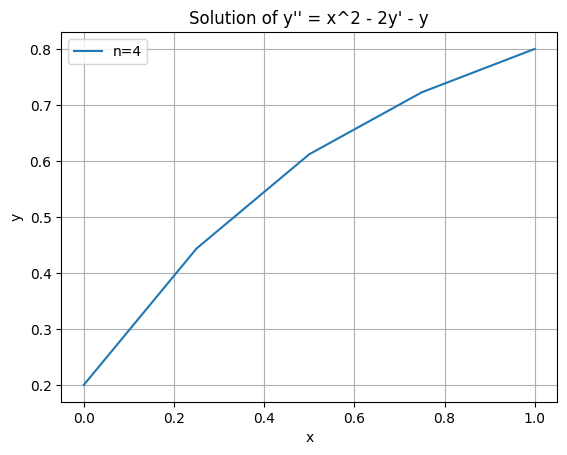

[0.2        0.44361809 0.6119256  0.72272447 0.8       ]


In [98]:
import numpy as np
import matplotlib.pyplot as plt

def finite_difference_method(x, y):
    # Step size
    h = x[1] - x[0]

    # Number of points
    N = len(x)

    # Create arrays for the finite difference equation
    A = np.zeros((N, N))
    b = np.zeros(N)

    # Set boundary conditions
    A[0, 0] = 1
    A[N-1, N-1] = 1
    b[0] = 0.2
    b[N-1] = 0.8

    # Construct the finite difference equation
    for i in range(1, N-1):
        A[i, i-1] = 1 / (h**2) - 1 / (2 * h)
        A[i, i] = -2 / (h**2) + 1
        A[i, i+1] = 1 / (h**2) + 1 / (2 * h)
        b[i] = x[i]**2 - 2 * (y[i+1] - y[i-1]) / (2 * h) - y[i]

    # Solve the finite difference equation
    y = np.linalg.solve(A, b)
    return y

# Define the domain
x = np.linspace(0, 1, 4+1)

# Initialize the solution array
y = np.zeros(len(x))

# Solve the equation using the finite difference method
y = finite_difference_method(x, y)

# Plot the solution
plt.plot(x, y,label='n=4')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of y\'\' = x^2 - 2y\' - y')
plt.legend()
plt.grid(True)
plt.show()

# Print the values of y
print(y)

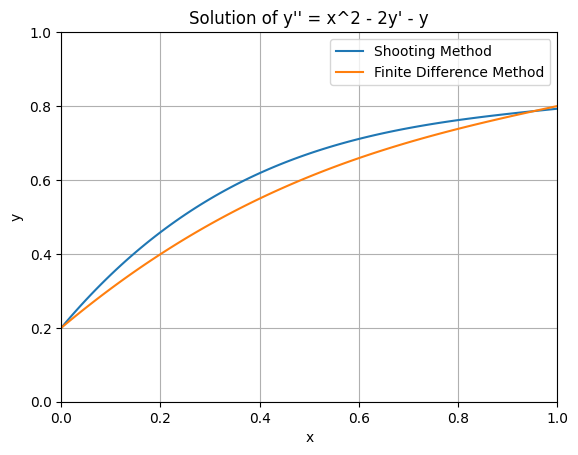

In [96]:
import numpy as np
import matplotlib.pyplot as plt

def shooting_method(f, a, b, alpha, beta, h, guesses):
    """
    f: function defining the 2nd order ODE as a system of 1st order ODEs
    a: start of interval
    b: end of interval
    alpha: boundary condition at a
    beta: boundary condition at b
    h: step size
    guesses: list of initial guesses for the value of y'(a)
    """
    n = int((b-a)/h)
    x = np.linspace(a, b, n+1)
    
    for guess in guesses:
        y = np.zeros((n+1, 2))
        y[0] = [alpha, guess]
        
        for i in range(n):
            k1 = h * f(x[i], y[i])
            k2 = h * f(x[i] + h/2, y[i] + k1/2)
            y[i+1] = y[i] + k2
            
        plt.plot(x, y[:,0], label='Shooting Method')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Shooting Method')
    plt.xlim(a, b)
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    

# Example usage
def f(x, y):
    return np.array([y[1], -2*y[1]-y[0]+x**2])

a = 0
b = 1
alpha = 0.2
beta = 0.8
h = 0.01
guesses = [1.6]

shooting_method(f, a, b, alpha, beta, h, guesses)
# Define the domain
x = np.linspace(0, 1, 100+1)

# Initialize the solution array
y = np.zeros(len(x))

# Solve the equation using the finite difference method
y = finite_difference_method(x, y)

# Plot the solution
plt.plot(x, y, label='Finite Difference Method')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of y\'\' = x^2 - 2y\' - y')
plt.grid(True)
plt.legend()
plt.show()

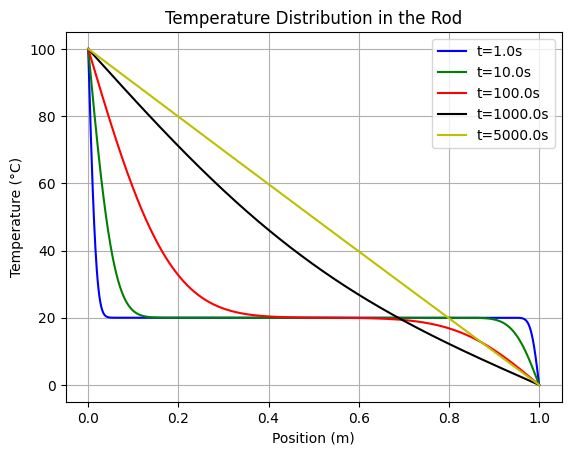

In [111]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 1.0  # length of the rod (m)
T_left = 100.0  # temperature at the left end (°C)
T_right = 0.0  # temperature at the right end (°C)
T_initial = 20.0  # initial uniform temperature (°C)
alpha = 1e-4  # thermal diffusivity (m^2/s)
c = 500  # specific heat capacity (J/(kg*K))
N = 1000  # number of points
dx = L / N  # distance between neighboring points
dt = 1e-3  # time step

# Initialize the temperature array
T = np.full(N, T_initial)

# Time points to simulate
t_finals = [1.0, 10.0, 100.0, 1000.0, 5000.0]  # different total times

# Plot settings
colors = ['b', 'g', 'r','k','y']
labels = [f't={t_final}s' for t_final in t_finals]

# Main loop for each total time
for t_final, color, label in zip(t_finals, colors, labels):
    # Reset the temperature array
    T = np.full(N, T_initial)
    
    # Main simulation loop
    t = 0.0
    while t < t_final:
        # Calculate the second derivative
        d2T = np.diff(T, 2) / dx**2
        
        # Update the temperature array
        T[1:-1] += alpha * d2T * dt
        
        # Apply boundary conditions
        T[0] = T_left
        T[-1] = T_right
        
        # Increment time
        t += dt
    
    # Plot the temperature distribution
    x = np.linspace(0, L, N)
    plt.plot(x, T, color, label=label)

# Plot settings
plt.xlabel('Position (m)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Distribution in the Rod')
plt.grid(True)
plt.legend()
plt.show()


The temperature in the metal rod changes from the initial uniform temperature to the steady-state distribution as heat flows from the hot end to the cold end. Initially, the temperature gradient increases, causing the rod to heat up near the hot end and remain cooler near the cold end. Over time, the temperature distribution reaches a steady-state where the temperature gradient becomes constant, and the heat flowing into each point balances the heat flowing out. The simulation allows us to observe this evolution and understand how the temperature profile changes over time.